Program 1

Christian Basso, Patrick McDonald, David Litton

CSC 3310

January 30, 2024

This file includes our hull algorithim along with a visualizor to ensure the output is correct, and benchmarking cases.

In [66]:
import copy
import math

# Program 1

This code will take in a list of tuples that represent a point with an x and y coordinate. It will create the largest convex hull possible from the points and return the list of all the points that represent the hull.

Here are our test cases:

In [67]:
arr1 = (())
arr2 = ((0, 0))
arr3 = ((0, 0), (1, 1))
arr4 = ((0, 0), (1, 1), (2, 2))
arr5 = ((0, 0), (1, 1), (2, 2), (3, 3))
arr6 = ((0, 0), (0, 1), (1, 0), (5, 5))
arr7 = ((15, 5), (8, 29), (4, 22), (26, 19), (10, 5), (21, 7), (19, 7), (30, 25), (14, 28), (19, 12))
arr8 = ((8, 16), (22, 7), (23, 27), (14, 16), (9, 20), (29, 30), (10, 17), (20, 21), (4, 12), (29, 5))
arr9 = ((0,0), (1, 1), (2, 2), (3, 3), (1, 4), (4, 5), (5, 6), (6, 7), (7, 8), (8, 9), (0, 5), (9, 0), 
        (4, 9), (0, 6), (6, 9), (0, 7), (7, 9), (0, 8), (8, 9), (0, 9), (7, 9), (6, 2))
arr10 = ((-8, 16), (22, -7), (-23, -27), (14, -16), (9, 20), (29, 30), (10, 17), (-20, 21), (4, -12), (29, 5))
arr11 = ((1.5, 2.7), (-3.8, 4.2), (0.0, -1.3), (5.9, 8.4), (-2.1, -7.6), (3.14, 2.71), (-6.66, 9.81), (0.707, -0.707), (10.5, 12.3), (-9.2, -11.5))


### Functions
These are all the supplemental needed for the hull algorithm

In [68]:
'''
Function to calculate distance between two points
:author: Christian B
'''
def distance(point1, point2):
    return math.sqrt((point1[0] - point2[0])**2 + (point1[1] - point2[1])**2)

'''
find_center_point(arr) function
returns the center point  as a tuple (x,y)
:param: arr - collection comprised of a series of x,y tuple points
:author: David L
'''
def find_center_point(arr):
    x_points = 0
    y_points = 0
    elements = 0
    for point in arr:
        x_points += point[0]
        y_points += point[1]
        elements += 1
    avg_x = x_points/elements
    avg_y = y_points/elements
    return (avg_x, avg_y)

'''
find_farthest_point(arr, center) function
returns the farthest point in the input arr from the input center
:param: arr - collection comprised of a series of x,y tuple points
:param: center - an x and y coordinate
:author: David L
'''
def find_farthest_point(arr, center):
    # define distance list
    distances = list()
    # calculate distance from center to all points and append to distance list
    for point in arr:
        distances.append(distance(point, center))
        
    # find max distance
    distances.sort(reverse=True)
    farthest_distance = distances[0]
    
    # find index of max distance
    distances.clear()
    for point in arr:
        distances.append(distance(point, center))
    index = distances.index(farthest_distance)
    
    # find and return point
    return arr[index]

#(Christian)
# define function to find most obtuse angle between current point and all other points
    # for each point
        # cacluate angle between current point and all other points
        # Return most obtuse point
'''
Calculate the angle 3 points make.
For the first itteration of the loop the points will be
The absolute center point (calculated), the farthest point, and the first point of intrest.
:author: Christian B
'''
def get_angle(A, B, C):
    # Calculate the lengths of the sides of the triangle
    AB = distance(A, B)
    BC = distance(B, C)
    AC = distance(A, C)
    # Use the law of cosines to calculate the angle at B
    cos_angle_B = (AB**2 + BC**2 - AC**2) / (2 * AB * BC)
    #print(cos_angle_B)
    # Python gives odd cosine values that are just outside of -1 or 1, this just rounds them to the nearest domain
    if(cos_angle_B > 1):
        cos_angle_B = 1
    elif (cos_angle_B < -1):
        cos_angle_B = -1
    angle_B_radians = math.acos(cos_angle_B)
    angle_B_degrees = round(math.degrees(angle_B_radians))
    return angle_B_degrees
    

### Hull_algorithim
In the following cell our hull algorithim will be defined. This algorithm will take in a array **input_arr** and return/print an array of all points on the hull.

In [69]:
def calculateHull(points):
    # If there are not enough points to make a hull, return -1
    if(len(points) < 3):
        print("Not enough points, need at least 3.")
        return -1
    # Find center point
    center_point = find_center_point(points) # ret (avg_x,avg_y)
    #Find futurest point from the center as a starting point
    farthest_point = find_farthest_point(points, center_point)
    
    # Make the array of all hull points to be returned
    hull_points = []

    # Tracker to see when the algorithim has made a complete hull
    has_reached_initial = False
    #Make a flag that tracks if the points make a straight line
    is_straight_line = True
    # Need 3 points at a time to check angles
    # First is the center point, second is the farthest point, third is the first point of intrest
    a = center_point
    b = farthest_point
    c = None

    # Loop until the algorithim has made a complete hull
    while not has_reached_initial:
        
        # track the largest angle
        largest_angle = -1
        #Holds the point that has the largest angle
        point_largest_angle = []


        # For each point in the list of points

        for p_in in points:

            # Set point of intrest to next point in the lis 
            c = p_in
            # the point of interst could be the furthest point, this skips that one point
            if c is not b:
                #Get the angle between the three points
                angle = get_angle(a, b, c)
                #If the angle is not 180, the points do not make a straight line
                if angle != 180 and angle != 0:
                    # Update the straight line flag
                    is_straight_line = False
                # If the angle is larger than the current largest angle
                if abs(angle) > largest_angle:
                    # Update the largest angle and the point of intrest
                    largest_angle = angle
                    # Set the point of intrest to the point with the largest angle
                    point_largest_angle = c
                #If the current angle is the same as the largest angle-----This fixes the straight line issue
                elif abs(angle) == largest_angle:
                    #If the angle is the same as the largest angle, check the distance
                    #If the distance is shorter, update the point of intrest
                    if distance(b, c) < distance(b, point_largest_angle):
                        point_largest_angle = c
                    


        # If the hull has made it all the way around, set flag to true
        if (point_largest_angle[0] is farthest_point[0] and point_largest_angle[1] is farthest_point[1]):
            has_reached_initial = True
        # Add the most recent hull point to the list of hull points
        hull_points.append(point_largest_angle)

        #Update the points for the next itteration
        a = b
        b = point_largest_angle
        # print(a, b)
        c = None
        
        #If the hull points make a straight line, return -1
        if is_straight_line:
            print("The points make a straight line, no hull can be made.")
            return -1
    return hull_points
    
    

In [70]:
calculateHull(arrneg)

[(8, -16), (20, -21), (29, 30), (-29, 5)]

#### Function to visualize hull
This allows users to visualize the hull to esnure it is correct

In [71]:
import matplotlib.pyplot as plt

def plot_points(arr, hull_points):
    # Extract x and y coordinates from the arr
    x = [point[0] for point in arr]
    y = [point[1] for point in arr]

    # Plot the points
    plt.scatter(x, y)

    plt.show()

    # Extract x and y coordinates from the arr
    x = [point[0] for point in arr]
    y = [point[1] for point in arr]

    # Plot the points
    plt.scatter(x, y)

    if(hull_points == -1):
        print("No hull points to plot.")
        return

    # Extract x and y coordinates from the hull_points
    hull_x = [point[0] for point in hull_points]
    hull_y = [point[1] for point in hull_points]
    plt.scatter(hull_x, hull_y, color = 'red')


    # Connect the lines all the way around
    hull_x.append(hull_x[0])
    hull_y.append(hull_y[0])

    # Plot the hull points as a connected line
    plt.plot(hull_x, hull_y, color='red')

    # Add labels and title
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Plot of Points with Hull')

    # Show the plot
    plt.show()
    

        

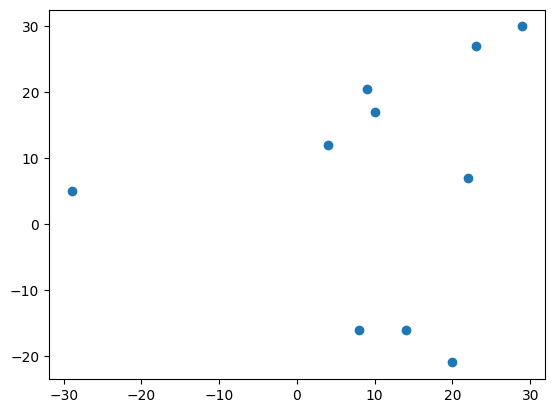

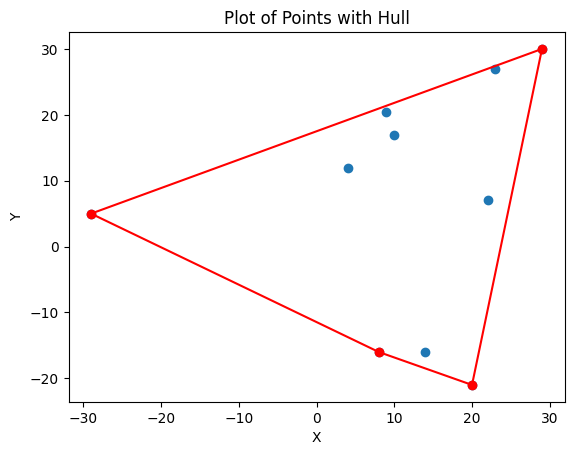

In [72]:
plot_points(arrneg, calculateHull(arrneg))

# Benchmarking

#### 4 Elements

In [73]:
import random

In [74]:
%%time
arr4 = [(random.randint(-20, 20), random.randint(-20, 20)) for _ in range(4)]
calculateHull(arr4)
calculateHull(arr4)

CPU times: total: 0 ns
Wall time: 0 ns


[(18, 3), (19, 17), (7, 15), (9, -3)]

#### 50 Elements

In [75]:
%%time
arr50 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(50)]))
calculateHull(arr50)
#plot_points(arr50, calculateHull(arr50))




CPU times: total: 0 ns
Wall time: 998 µs


[(-2, 955),
 (-94, 911),
 (-99, 550),
 (-99, 7),
 (-87, -91),
 (12, -40),
 (90, 132),
 (97, 385),
 (50, 978)]

#### 200 Elements

In [76]:
%%time
arr200 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(200)]))
calculateHull(arr200)
#plot_points(arr50, calculateHull(arr50))




CPU times: total: 0 ns
Wall time: 7 ms


[(-68, 982),
 (-83, 934),
 (-94, 890),
 (-97, 700),
 (-99, 507),
 (-100, -3),
 (-91, -93),
 (-33, -95),
 (53, -81),
 (82, -63),
 (93, -33),
 (100, 459),
 (98, 689),
 (93, 954),
 (74, 970),
 (34, 1000)]

#### 400 Elements

In [77]:
%%time
arr400 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(400)]))
calculateHull(arr400)
#plot_points(arr50, calculateHull(arr50))




CPU times: total: 15.6 ms
Wall time: 16.3 ms


[(57, 994),
 (80, 972),
 (99, 941),
 (100, 221),
 (100, -5),
 (95, -59),
 (84, -72),
 (65, -92),
 (34, -99),
 (-38, -97),
 (-64, -96),
 (-98, -43),
 (-97, 53),
 (-96, 108),
 (-95, 146),
 (-92, 249),
 (-85, 476),
 (-75, 838),
 (-78, 935),
 (-82, 967),
 (-95, 1000)]

#### 600 Elements

In [78]:
%%time
arr600 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(600)]))
calculateHull(arr600)
#plot_points(arr50, calculateHull(arr50))




CPU times: total: 15.6 ms
Wall time: 28.4 ms


[(-50, -94),
 (-94, -93),
 (-96, -42),
 (-100, 75),
 (-100, 234),
 (-100, 365),
 (-100, 623),
 (-100, 808),
 (-100, 838),
 (-96, 960),
 (-26, 989),
 (75, 999),
 (87, 994),
 (97, 908),
 (100, 810),
 (100, 794),
 (99, 522),
 (99, 350),
 (99, 302),
 (98, 87),
 (97, -37),
 (97, -69),
 (69, -99)]

#### 800 Elements

In [79]:
%%time
arr800 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(800)]))
calculateHull(arr800)
#plot_points(arr50, calculateHull(arr50))




CPU times: total: 31.2 ms
Wall time: 35.2 ms


[(98, 995),
 (100, 989),
 (100, 162),
 (100, 26),
 (95, -12),
 (86, -56),
 (80, -72),
 (73, -83),
 (50, -100),
 (-12, -100),
 (-74, -96),
 (-100, -94),
 (-99, -25),
 (-96, 235),
 (-95, 340),
 (-94, 450),
 (-92, 581),
 (-91, 644),
 (-87, 813),
 (-84, 932),
 (-84, 995),
 (-18, 997),
 (79, 1000)]

#### 1000 Elements

In [80]:
%%time
arr1000 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(1000)]))
print(len(arr1000))
calculateHull(arr1000)
#plot_points(arr50, calculateHull(arr50))


998
CPU times: total: 15.6 ms
Wall time: 59.7 ms


[(45, -94),
 (73, -87),
 (92, -51),
 (97, -19),
 (99, 42),
 (99, 57),
 (99, 203),
 (99, 271),
 (98, 478),
 (98, 486),
 (96, 781),
 (96, 839),
 (97, 878),
 (99, 942),
 (91, 998),
 (-91, 1000),
 (-100, 983),
 (-99, 823),
 (-98, 730),
 (-97, 670),
 (-93, 485),
 (-89, 323),
 (-82, 49),
 (-78, -86),
 (12, -99)]

#### 1500 Elements

In [81]:
%%time
arr1500 = list(set([(random.randint(-100, 100), random.randint(-100, 1000)) for _ in range(1500)]))
testarr = calculateHull(arr1500)
print(len(testarr))

29
CPU times: total: 46.9 ms
Wall time: 92.6 ms


## Plotting times


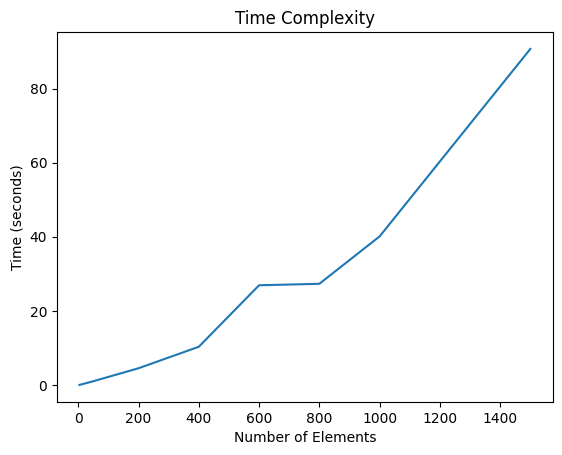

In [82]:
import matplotlib.pyplot as plt

num_elements = [4, 50, 200, 400, 600, 800, 1000, 1500]
times = [0, 1.00, 4.5, 10.3, 26.9, 27.3, 40.1, 90.7]


plt.plot(num_elements, times)

plt.xlabel('Number of Elements')
plt.ylabel('Time (seconds)')
plt.title('Time Complexity')
plt.show()


### Testing worst case time compexity with circle

In [83]:
def makeCircle(radius, iterations):
    pointsx = []
    pointsy = []
    for i in range(0, iterations):
        x = random.uniform(-radius, radius)
        y = math.sqrt(radius**2 - x**2)
        pointsx.append(x)
        pointsy.append(y)
        pointsx.append(-x)
        pointsy.append(-y)
    
    return (pointsx, pointsy)

(x, y) = makeCircle(500, 750)

matched_points = list(set((zip(x, y))))




In [84]:
print(len(matched_points))

1500


In [85]:
%%time
calculateHull(matched_points)

CPU times: total: 1.47 s
Wall time: 5.35 s


[(-111.27063559338058, 487.4616350592579),
 (-110.82798047618223, 487.5624665041096),
 (-109.3917473880548, 487.8867139033282),
 (-109.37449443203087, 487.8905819625315),
 (-108.62886420896979, 488.0571379056649),
 (-108.50556352793762, 488.0845650944974),
 (-108.4622390983265, 488.09419448481196),
 (-107.2262044980522, 488.36721948646584),
 (-105.22594045606218, 488.80210868524006),
 (-104.91884638900149, 488.8681168499344),
 (-101.03045874157556, 489.6864776634809),
 (-99.86442485986669, 489.9256031760414),
 (-93.95218441161654, 491.0936642273912),
 (-91.03867066724126, 491.6421060518938),
 (-89.91620814173473, 491.8486306918138),
 (-89.3249876098887, 491.9563462223993),
 (-87.31705765064834, 492.3166983185045),
 (-86.23643318263652, 492.5071345594261),
 (-85.47178374981559, 492.64041062688386),
 (-83.58490882978845, 492.96405854374),
 (-82.9050911902782, 493.0788434466963),
 (-81.50688756452126, 493.3118965518108),
 (-78.48792530501879, 493.8012207167109),
 (-78.01917648302128, 493.